<a href="https://colab.research.google.com/github/jonatanriq/oceanografia/blob/main/analisando_dados_elnino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
nino = pd.read_csv('/content/elnino.csv')

# colocando o titulo das colunas para minusculo
nino = nino[nino.columns[:]].set_axis([nome.lower() for nome in nino.columns[:]], axis=1, inplace=False)

# tirando os espaços dos nomes das colunas
nino = nino[nino.columns[:]].set_axis([nome.strip() for nome in nino.columns[:]], axis=1, inplace=False)

# colocando o índice em datetime
nino.index = pd.to_datetime(nino['year'].astype(str)+'-'+nino['month'].astype(str)+'-'+nino['day'].astype(str))

# removendo as colunas que não vou usar
nino.drop([nomes for nomes in nino.columns[0:5]], axis=1, inplace=True)

# transformando as colunas em numérico
nino = nino[nino.columns[:]].apply(pd.to_numeric, errors='coerce', axis=1)

# removendo colunas que tenham mais de 30% de valores faltantes
for nome in nino.columns[:]:
  if nino[nome].isnull().sum()/len(nino[nome]) > 0.3: 
    nino.drop(nome, axis=1,inplace=True)

nino

,latitude,longitude,zonal winds,meridional winds,air temp,sea surface temp
1980-03-07,-0.02,-109.46,-6.8,0.7,26.14,26.24
1980-03-08,-0.02,-109.46,-4.9,1.1,25.66,25.97
1980-03-09,-0.02,-109.46,-4.5,2.2,25.69,25.28
1980-03-10,-0.02,-109.46,-3.8,1.9,25.57,24.31
1980-03-11,-0.02,-109.46,-4.2,1.5,25.30,23.19
...,...,...,...,...,...,...
1998-06-11,8.96,-140.33,-5.1,-0.4,26.04,28.14
1998-06-12,8.96,-140.32,-4.3,-3.3,25.80,27.87
1998-06-13,8.95,-140.34,-6.1,-4.8,27.17,27.93
1998-06-14,8.96,-140.33,-4.9,-2.3,27.36,28.03


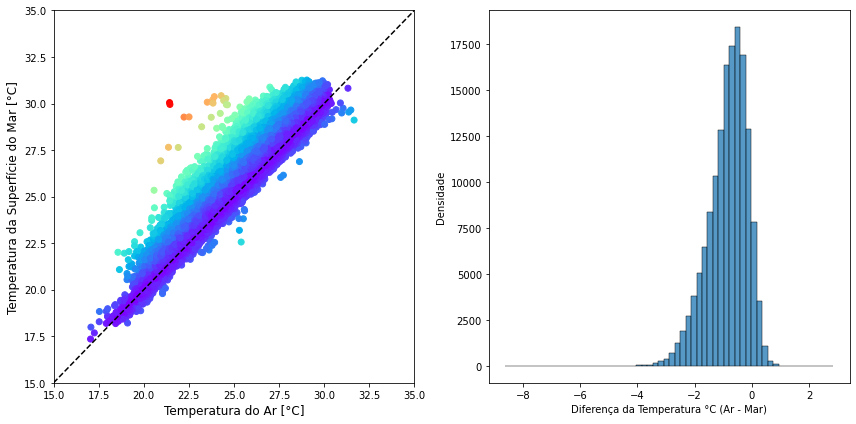

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, [ax1,ax2] = plt.subplots(figsize=(12,6), ncols=2)

# fazendo as diferenças nas cores 
diff = nino[nino.columns[-2]]- nino[nino.columns[-1]]

ax1.scatter(nino[nino.columns[-2]], nino[nino.columns[-1]], c=np.abs(diff), cmap='rainbow')
ax1.plot([0,1],[0,1], '--k', transform=ax1.transAxes)
ax1.set_xlim(15,35)
ax1.set_ylim(15,35)
ax1.set_xlabel('Temperatura do Ar [°C]', fontsize=12)
ax1.set_ylabel('Temperatura da Superfície do Mar [°C]', fontsize=12)

# o histograma dos dados
histograma = sns.histplot(diff, ax=ax2, bins=60)
ax2.set_xlabel('teste')
ax2.set_ylabel('Densidade')
ax2.set_xlabel('Diferença da Temperatura °C (Ar - Mar)')
ax2.vlines(0,-1,1,color='k')

plt.tight_layout()
plt.show()

In [5]:
airtmp_interp = nino[nino.columns[-2]].resample('1D').mean().interpolate(method ='linear', limit_direction ='forward')
sst_interp = nino[nino.columns[-1]].resample('1D').mean().interpolate(method ='linear', limit_direction ='forward')

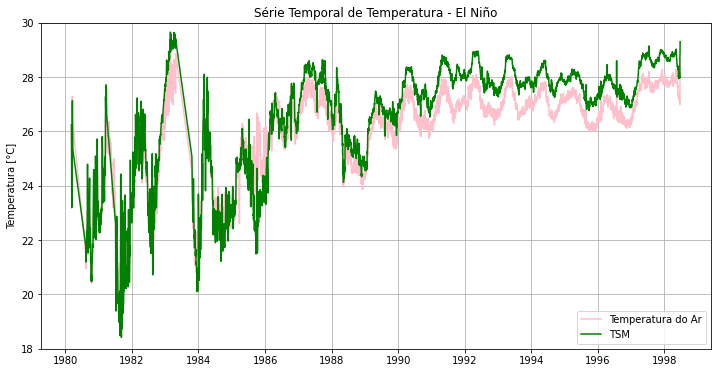

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(airtmp_interp, color='pink', linestyle='-', label='Temperatura do Ar')
ax.plot(sst_interp, color='green', linestyle='-', label='TSM')
plt.ylim(18,30)
plt.xlim()
plt.legend()
plt.ylabel('Temperatura [°C]')
plt.title('Série Temporal de Temperatura - El Niño')
plt.grid()

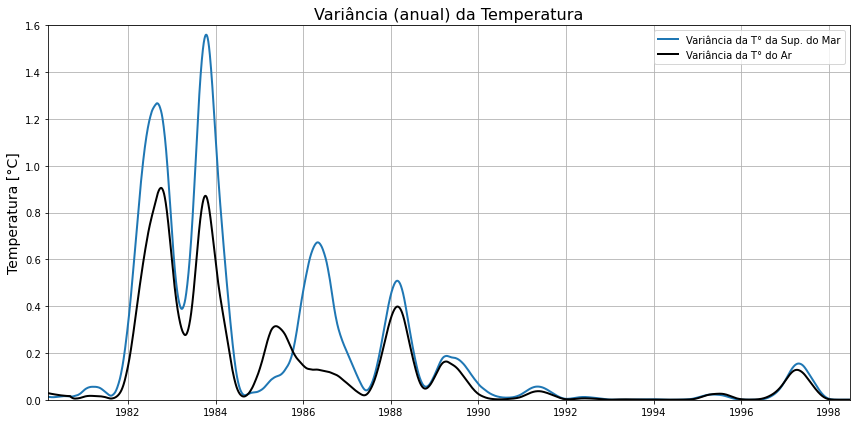

In [9]:
ws = 365 # 1 ano de janela 
media_movel_sst = sst_interp.rolling(ws, center=True, min_periods=1).mean()
var_sst = media_movel_sst.rolling(ws, center=True, min_periods=1).var()

media_movel_air = airtmp_interp.rolling(ws, center=True, min_periods=1).mean()
var_air = media_movel_air.rolling(ws, center=True, min_periods=1).var()

plt.figure(figsize=(12,6))
plt.plot(var_sst, linewidth=2, label='Variância da T° da Sup. do Mar')
plt.plot(var_air, color='k', linestyle='-', linewidth=2, label='Variância da T° do Ar')
plt.xlim(var_air.index.min(), var_air.index.max())
plt.ylim(0,1.6)
plt.ylabel('Temperatura [°C]', fontsize=14)
plt.title('Variância (anual) da Temperatura', fontsize=16)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()